In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
etl = pd.read_csv("algo/etl-market-share.csv")
fng_n = pd.read_csv("algo/fng-metrics-normalized.csv")
fng_u = pd.read_csv("algo/fng-metrics-unnormalized.csv")

# Все гистограммы
Откроем файл с нормированными данными (fng-metrics-normalized) и построим гистограммы по каждой из 4 колонок:

Моментум (**MOMENTUM**) — соотношение между индексом Мосбиржи (IMOEX) и его 125-дневной средней;

Сила (**STRENGTH**) — разница между числом акций, достигших максимумов и минимумов за 52 недели;

Ширина (**BREADTH**) — соотношение объемов в растущих и падающих акциях;

Волатильность рынка (**VOLATILITY**) — соотношение индекса волатильности RVI и его 50-дневной средней;


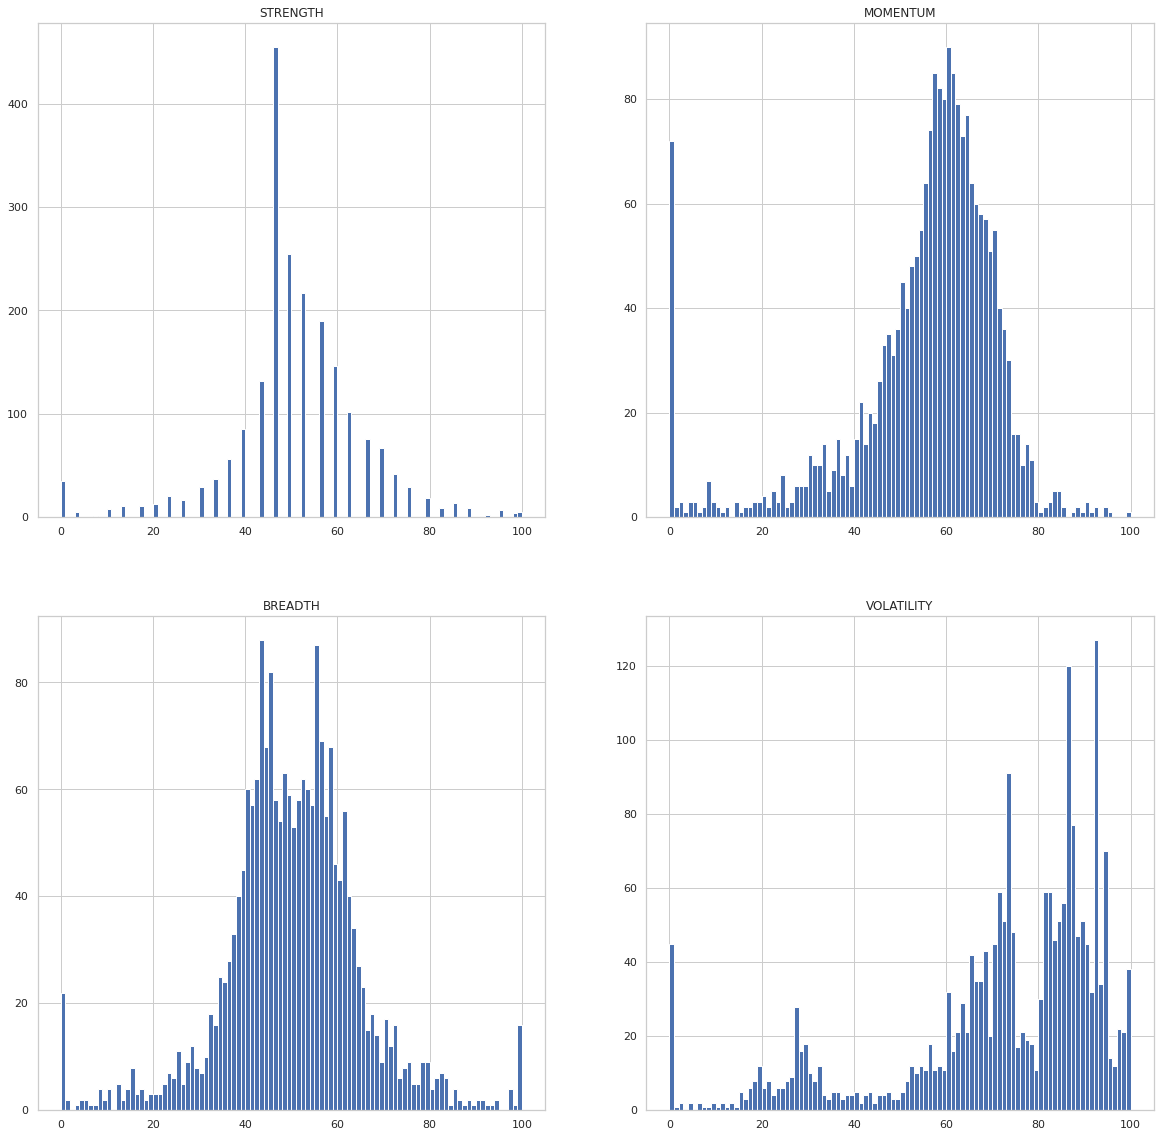

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for n, name in enumerate(fng_n.columns[1:]):
    i = n % 2
    j = n // 2
    ax[i][j].hist(fng_n[name], bins=100)
    ax[i][j].set_title(name)

Корреляции:

In [4]:
fng_n.corr()

,STRENGTH,BREADTH,MOMENTUM,VOLATILITY
STRENGTH,1.000000,0.297133,0.620662,0.286510
BREADTH,0.297133,1.000000,0.089069,-0.015588
MOMENTUM,0.620662,0.089069,1.000000,0.533978
VOLATILITY,0.286510,-0.015588,0.533978,1.000000


# Индекс Страха и Жадности
Для построения Индекса Страха и Жадности (индекс, показывающий настроение инвесторов на рынке) рассмотрим 4 Барометра, описанных выше:

Моментум (**MOMENTUM**) — соотношение между индексом Мосбиржи (IMOEX) и его 125-дневной средней;

Сила (**STRENGTH**) — разница между числом акций, достигших максимумов и минимумов за 52 недели;

Ширина (**BREADTH**) — соотношение объемов в растущих и падающих акциях;

Волатильность рынка (**VOLATILITY**) — соотношение индекса волатильности RVI и его 50-дневной средней;

Составим из разрозненных чисел в таблице в разных диапазонах одно.
Приведем числа в один диапазон —  [0; 100] (нормализация данных). Далее проссумируем их с некоторыми весами и найдем среднее: (**MOMENTUM** * a + **STRENGTH** * b + **BREADTH** * c + **VOLATILITY** * d ) / 4, где a = 2, b = 1, c = 1, d = 2. (Здесь больший вес указан для наиболее значимых данных). Построим полученный график и укажем одну из очевидных аномалий:

In [5]:
y = (fng_n["STRENGTH"] + fng_n["BREADTH"] + fng_n["MOMENTUM"] * 2 + fng_n["VOLATILITY"] * 2) / 4

Text(30, 20, 'Anomaly')

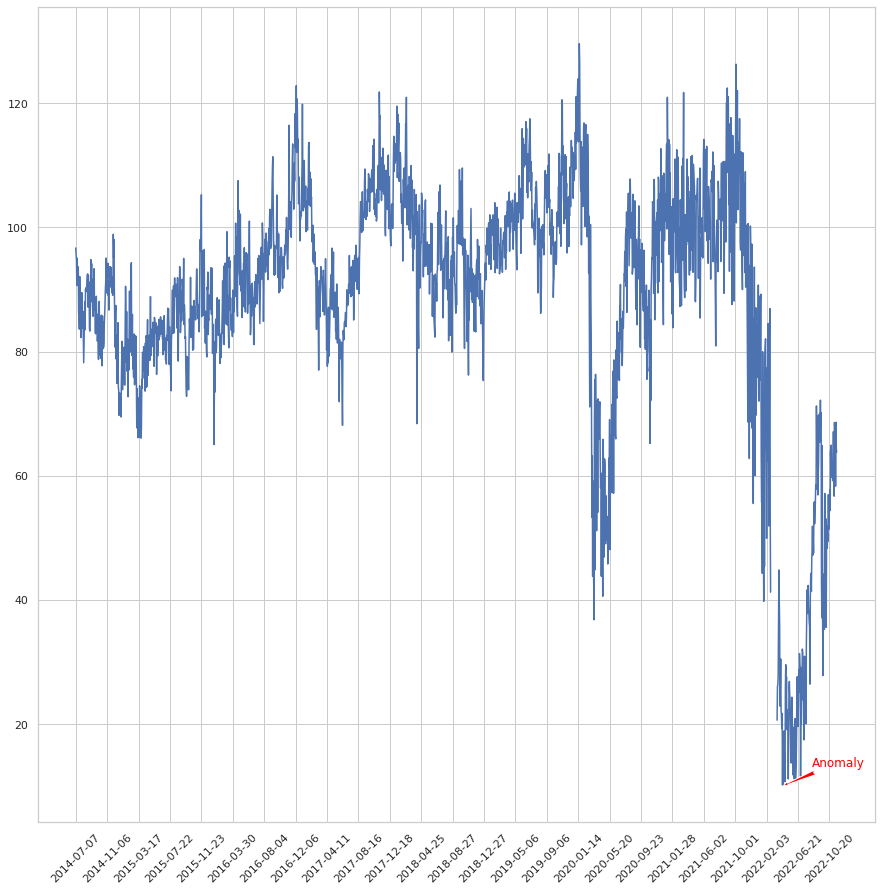

In [6]:
plt.figure(figsize=(15, 15))
plt.plot(y)
n = len(fng_n)
xticks = list(range(0, n, n // 24))
xlables = fng_n["DATE"][xticks]
_ = plt.xticks(xticks, labels=xlables, rotation=45)
plt.annotate('Anomaly', (int(n // 24 * 22.5), 10), xytext=(30, 20), 
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

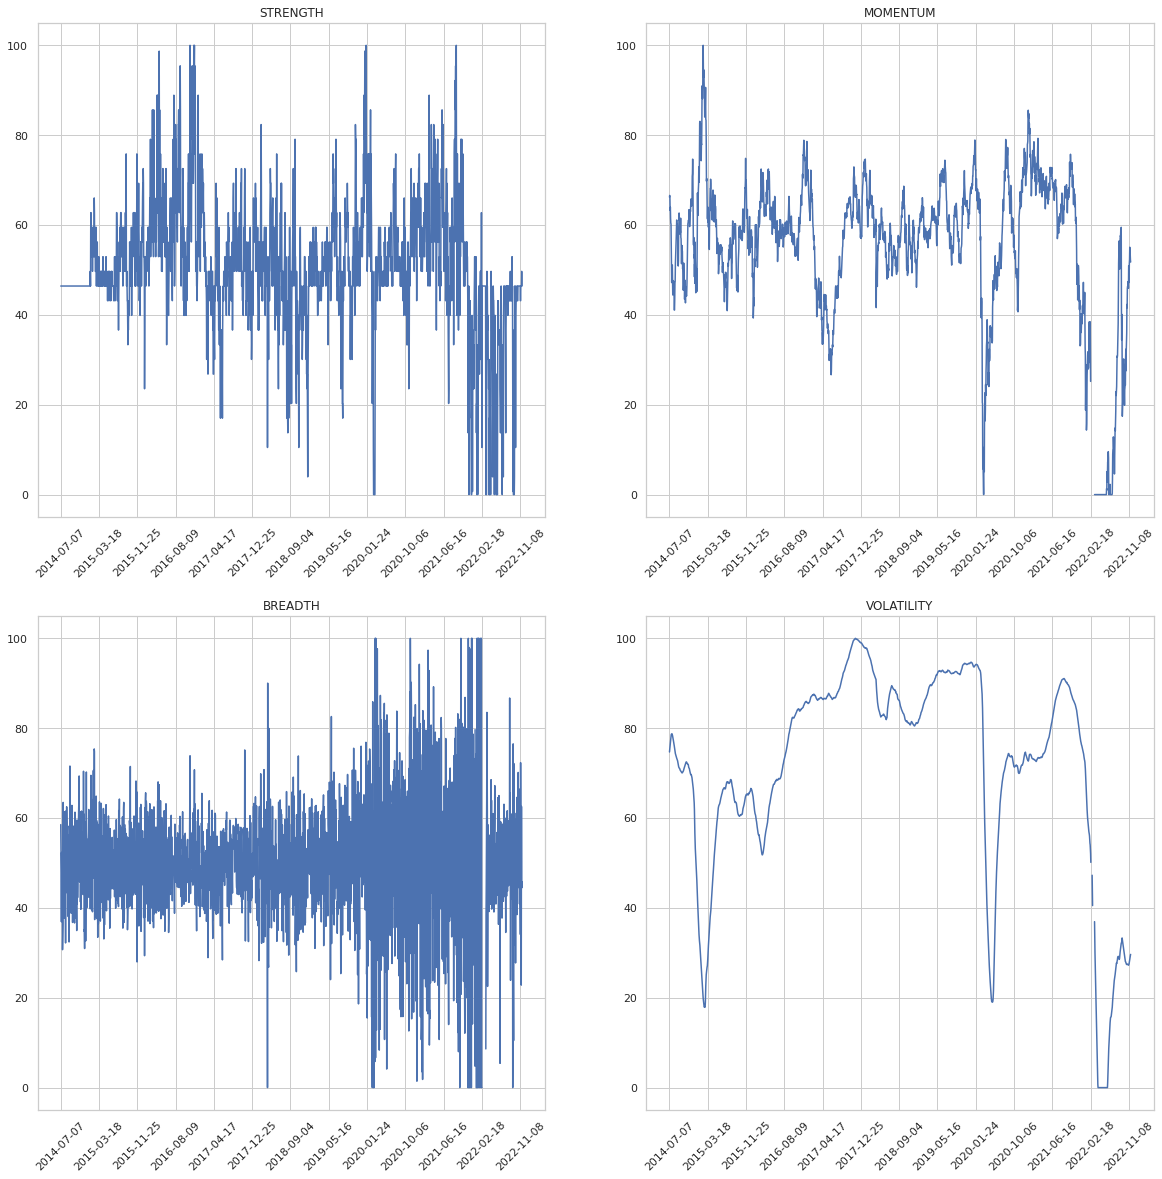

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for n, name in enumerate(fng_n.columns[1:]):
    i = n % 2
    j = n // 2
    ax[i][j].plot(fng_n[name])
    ax[i][j].set_title(name)
    n = len(fng_n)
    xticks = list(range(0, n, n // 12))
    xlables = fng_n["DATE"][xticks]
    _ = ax[i][j].set_xticks(xticks, labels=xlables, rotation=45)

# Нормализация данных

Для нормализации данных рассмотрим 2 популярных подхода:
1. MinMax scale.
2. Центрирование и нормирование.

### 1. MinMax scale

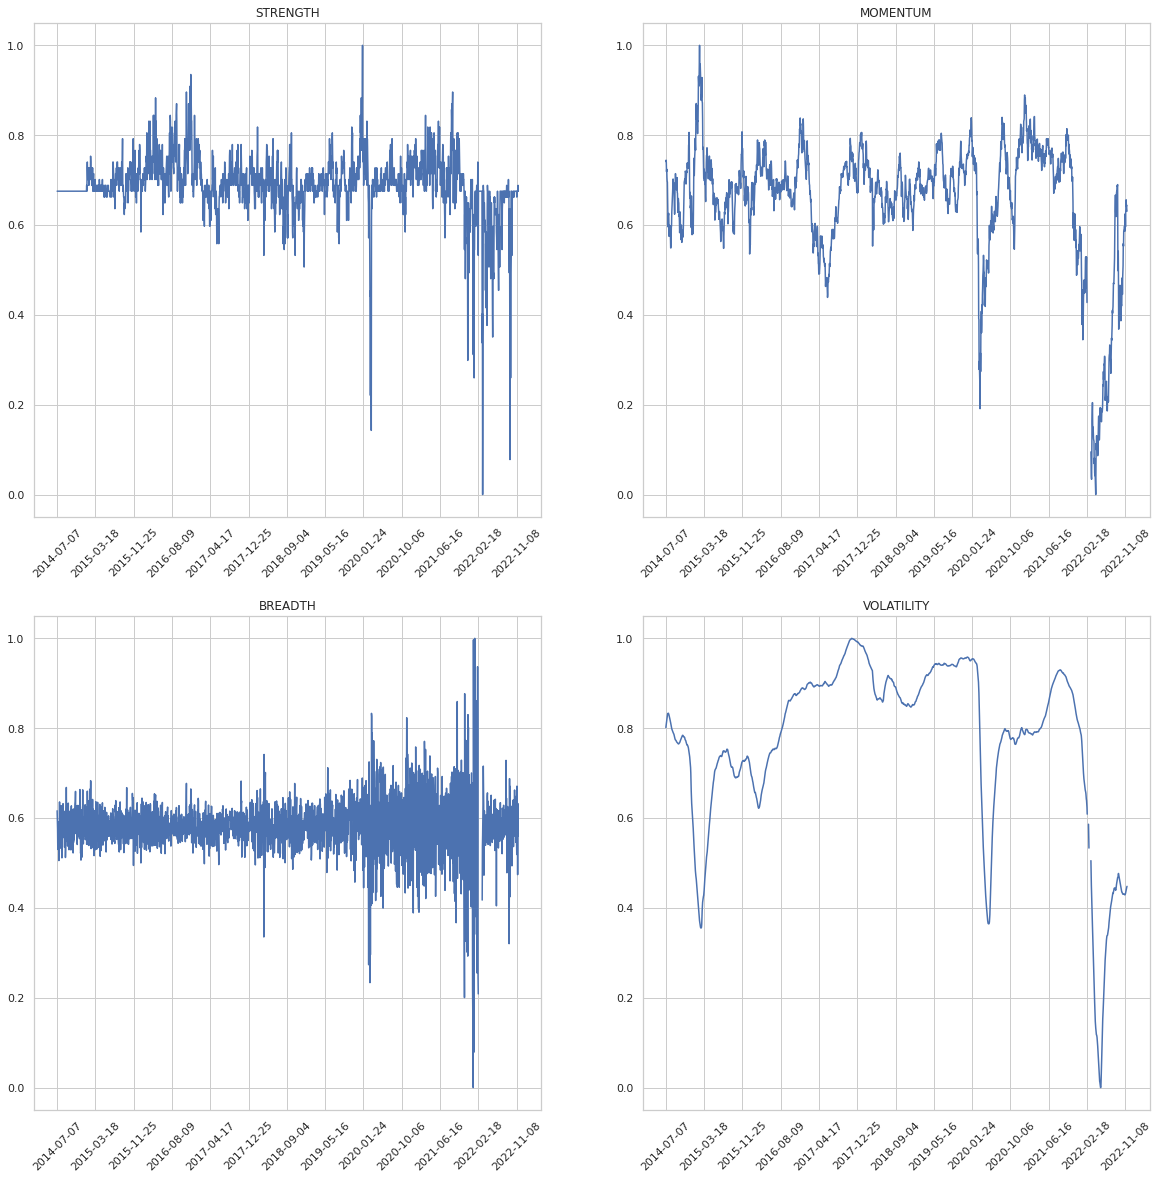

In [8]:
normalized = fng_u.copy()
columns = fng_u.columns[1:]
for c in columns:
    normalized[c] = (normalized[c] - normalized[c].min()) / (normalized[c].max() - normalized[c].min())

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for n, name in enumerate(normalized.columns[1:]):
    i = n % 2
    j = n // 2
    ax[i][j].plot(normalized[name])
    ax[i][j].set_title(name)
    n = len(fng_n)
    xticks = list(range(0, n, n // 12))
    xlables = normalized["DATE"][xticks]
    _ = ax[i][j].set_xticks(xticks, labels=xlables, rotation=45)

### 2. Центрирование и нормирование

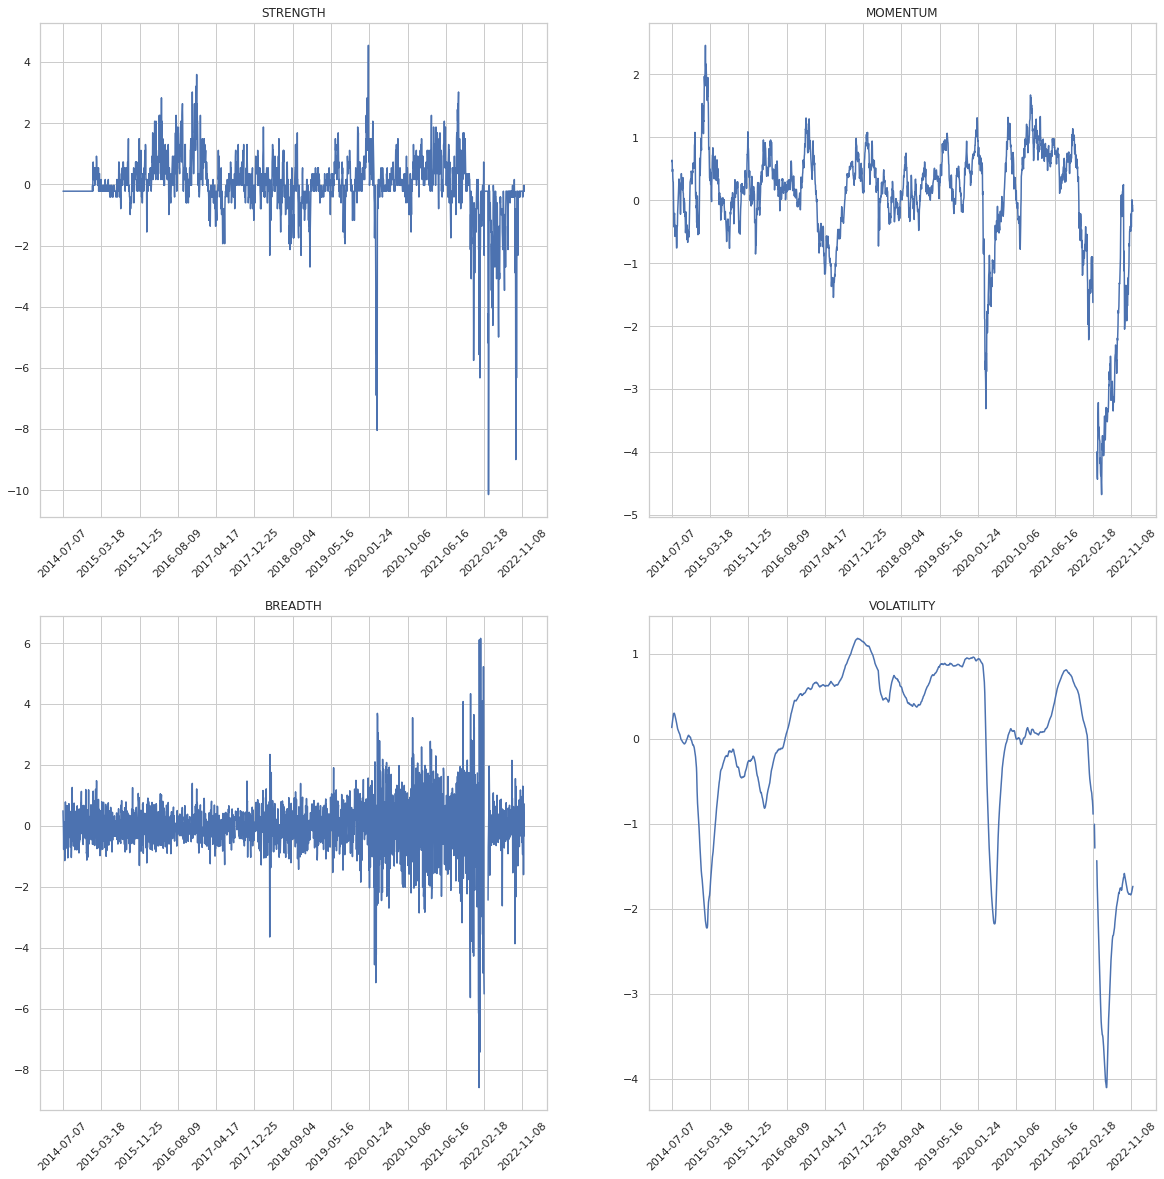

In [9]:
normalized = fng_u.copy()
columns = fng_u.columns[1:]
for c in columns:
    normalized[c] = (normalized[c] - normalized[c].mean()) / normalized[c].std()

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for n, name in enumerate(normalized.columns[1:]):
    i = n % 2
    j = n // 2
    ax[i][j].plot(normalized[name])
    ax[i][j].set_title(name)
    n = len(fng_n)
    xticks = list(range(0, n, n // 12))
    xlables = normalized["DATE"][xticks]
    _ = ax[i][j].set_xticks(xticks, labels=xlables, rotation=45)

# Детекция аномалий

1. Аномалии можно искать без использования алгоритмов (визуальная оценка) на графиках, построенных по датам, и сопоставлять полученные данные с геополитическими / экономическими событиями в мире.
2. Если индикатор похож на нормальное распределение, можно искать значения, которые на графике расположены дальше, чем 3-4 стандартных отклонения (3-sigma rule).
3. Можно искать аномалии с помощью машинного обучения.

### 1. Визуальная оценка
По графикам **MOMENTUM** и **VOLATILITY** можно увидеть аномально низкие значения около дат 2020-01-24 и падение значений с 2022-01-01.
Также аномально высокие значения можно увидеть 2015-03-18 по графику **MOMENTUM** и 2017-04-17, 2021-06-16 по графику **VOLATILITY**

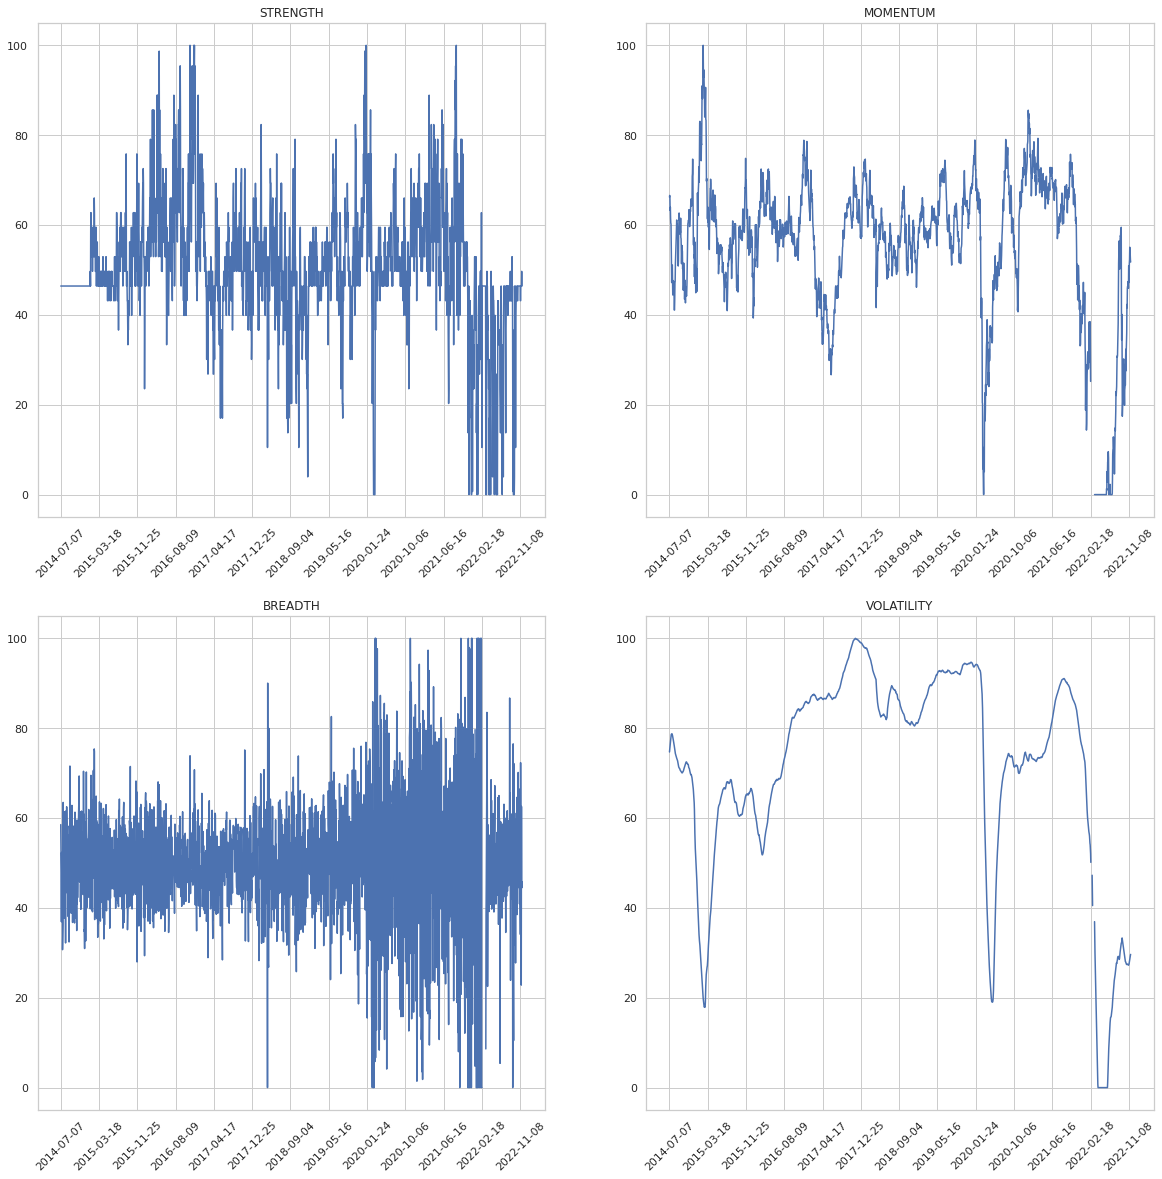

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for n, name in enumerate(fng_n.columns[1:]):
    i = n % 2
    j = n // 2
    ax[i][j].plot(fng_n[name])
    ax[i][j].set_title(name)
    n = len(fng_n)
    xticks = list(range(0, n, n // 12))
    xlables = fng_n["DATE"][xticks]
    _ = ax[i][j].set_xticks(xticks, labels=xlables, rotation=45)

### 2. Детекция аномалий по правилу трех сигм
Из графиков нормализованных значений видно, что все графики, кроме **VOLATILITY**, выглядят нормально распределенными (имеют форму колокола):

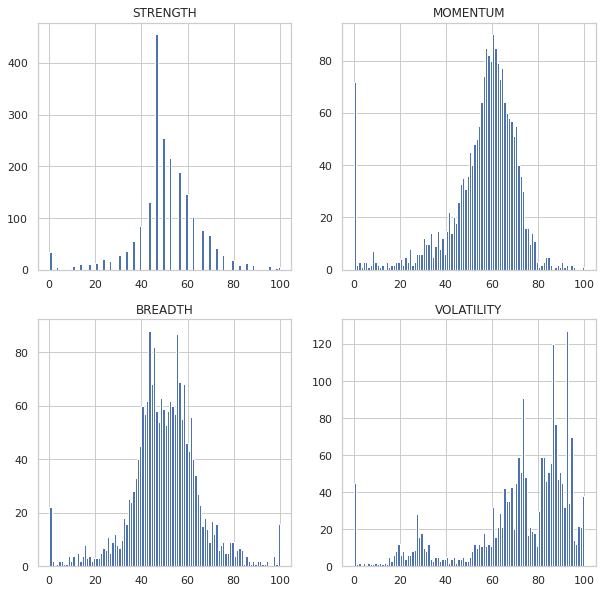

In [11]:
normalized = fng_n.copy()
columns = normalized.columns[1:]
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for n, name in enumerate(normalized.columns[1:]):
    i = n % 2
    j = n // 2
    ax[i][j].hist(normalized[name], bins=100)
    ax[i][j].set_title(name)

In [12]:
columns = ["STRENGTH", "MOMENTUM", "BREADTH"]
for c in columns:
    std = normalized[c].std()
    mean = normalized[c].mean()
    normalized[c] = ((normalized[c] - mean).abs() / std) >= 3

Выделим все даты, которые хотя бы по одному параметру выходят за 3 сигмы:

In [13]:
for c in columns:
    print(c)
    print("\n".join(normalized["DATE"][normalized["STRENGTH"]]))

STRENGTH
2016-04-20
2016-09-07
2016-11-10
2016-11-24
2016-12-05
2016-12-06
2016-12-07
2016-12-08
2016-12-12
2018-12-25
2020-01-10
2020-01-13
2020-01-17
2020-01-20
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-16
2020-03-17
2020-03-18
2021-09-01
2021-09-03
2021-09-06
2021-11-26
2021-12-13
2021-12-14
2021-12-20
2022-01-18
2022-01-24
2022-03-24
2022-03-25
2022-03-28
2022-03-29
2022-04-14
2022-04-18
2022-04-19
2022-04-25
2022-05-12
2022-05-24
2022-05-31
2022-06-03
2022-06-06
2022-06-07
2022-06-09
2022-06-10
2022-06-14
2022-07-13
2022-07-14
2022-07-21
2022-09-21
2022-09-23
2022-09-26
2022-09-27
2022-09-29
2022-09-30
MOMENTUM
2016-04-20
2016-09-07
2016-11-10
2016-11-24
2016-12-05
2016-12-06
2016-12-07
2016-12-08
2016-12-12
2018-12-25
2020-01-10
2020-01-13
2020-01-17
2020-01-20
2020-03-10
2020-03-11
2020-03-12
2020-03-13
2020-03-16
2020-03-17
2020-03-18
2021-09-01
2021-09-03
2021-09-06
2021-11-26
2021-12-13
2021-12-14
2021-12-20
2022-01-18
2022-01-24
2022-03-24
2022-03-25
2022-03-28
202

Все даты, в которых 3 параметра вместе выходят за 3 сигмы. Таких дат нет.

In [14]:
normalized["OUTLIER"] = normalized["STRENGTH"] & normalized["MOMENTUM"] & normalized["BREADTH"]
print(normalized["DATE"][normalized["OUTLIER"]])

Series([], Name: DATE, dtype: object)


### 3. Поиск аномалий с помощью машинного обучения (график индекса Страха и Жадности)
Для примера используем модель `IsolationForest`. В качестве оценки числа аномальный позиций возьмем 0.01. Аномалии отмечены на полученном графике красными точками:

In [15]:
fng_n["SUM"] = (fng_n["STRENGTH"] + fng_n["BREADTH"] + fng_n["MOMENTUM"] * 2 + fng_n["VOLATILITY"] * 2) / 4
fng = fng_n.dropna()

In [16]:
from sklearn.ensemble import IsolationForest
import numpy as np
model = IsolationForest(contamination=0.01)

In [17]:
predictions = model.fit_predict(np.array(fng["SUM"]).reshape(-1, 1))

In [18]:
subtable = fng[predictions == -1]

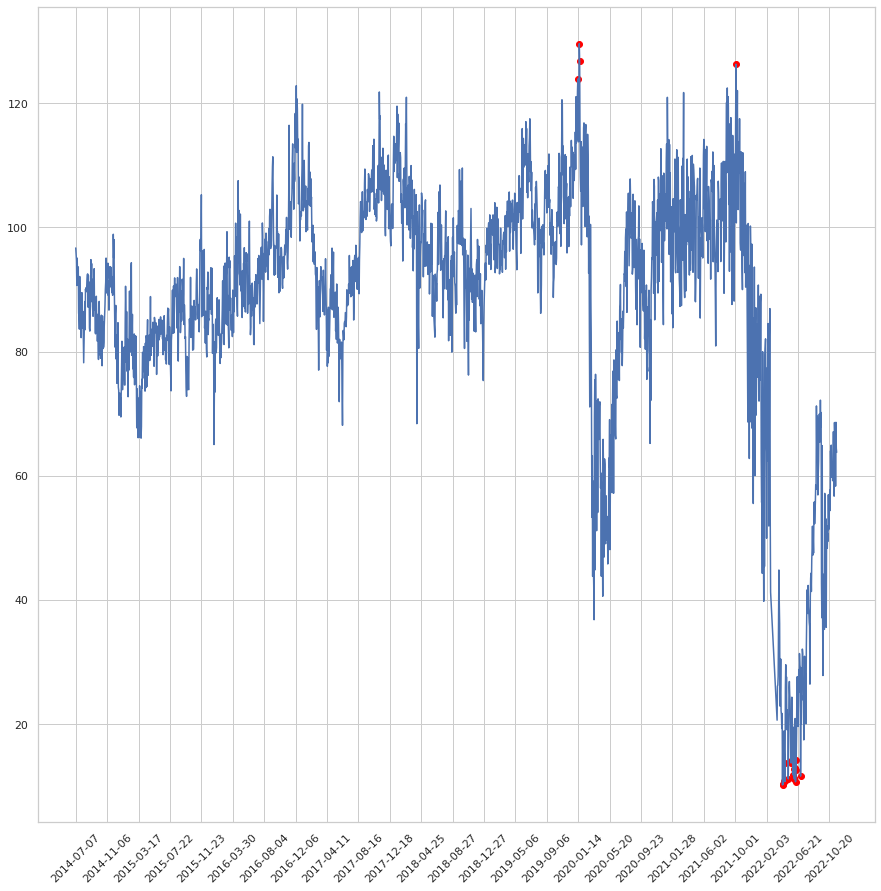

In [19]:
plt.figure(figsize=(15, 15))
plt.plot(fng["SUM"])
n = len(fng)
xticks = list(range(0, n, n // 24))
xlables = fng["DATE"][xticks]
_ = plt.xticks(xticks, labels=xlables, rotation=45)
plt.scatter(subtable.index, subtable["SUM"], color='red')